<a href="https://colab.research.google.com/github/geekydevesh/wind_energy_forcast/blob/master/wind_energy_forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [12]:
dataframe = pandas.read_csv('/content/drive/My Drive/T1.csv', usecols=[0], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset

array([[ 380.0478],
       [ 453.7692],
       [ 306.3766],
       ...,
       [2201.107 ],
       [2515.694 ],
       [2820.466 ]], dtype=float32)

In [13]:

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.10563315],
       [0.1259914 ],
       [0.08528875],
       ...,
       [0.60852087],
       [0.6953945 ],
       [0.77955765]], dtype=float32)

In [14]:
dataset

array([[0.10563315],
       [0.1259914 ],
       [0.08528875],
       ...,
       [0.60852087],
       [0.6953945 ],
       [0.77955765]], dtype=float32)

In [15]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

33855 16675


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 

In [0]:

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:


# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [19]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 41s - loss: 0.0069
Epoch 2/100
 - 41s - loss: 0.0049
Epoch 3/100
 - 41s - loss: 0.0049
Epoch 4/100
 - 41s - loss: 0.0048
Epoch 5/100
 - 40s - loss: 0.0048
Epoch 6/100
 - 40s - loss: 0.0048
Epoch 7/100
 - 40s - loss: 0.0048
Epoch 8/100
 - 40s - loss: 0.0048
Epoch 9/100
 - 40s - loss: 0.0048
Epoch 10/100
 - 42s - loss: 0.0048
Epoch 11/100
 - 40s - loss: 0.0048
Epoch 12/100
 - 40s - loss: 0.0048
Epoch 13/100
 - 40s - loss: 0.0048
Epoch 14/100
 - 40s - loss: 0.0048
Epoch 15/100
 - 40s - loss: 0.0048
Epoch 16/100
 - 40s - loss: 0.0048
Epoch 17/100
 - 40s - loss: 0.0048
Epoch 18/100
 - 41s - loss: 0.0048
Epoch 19/100
 - 40s - loss: 0.0048
Epoch 20/100
 - 40s - loss: 0.0048
Epoch 21/100
 - 40s - loss: 0.0048
Epoch 22/100
 - 40s - loss: 0.0048
Epoch 23/100
 - 40s - loss: 0.0048
Epoch 24/100
 - 40s - loss: 0.0048
Epoch 25/100
 - 40s - loss: 0.0048
Epoch 26/100
 - 41s - loss: 0.0048
Epoch 27/100
 - 40s - loss: 0.0048
Epoch 28/100
 - 40s - loss: 0.0048
Epoch 29/100
 - 39s - loss: 0

In [20]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 250.04 RMSE
Test Score: 235.82 RMSE


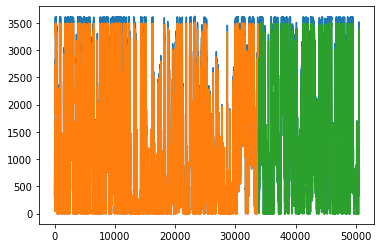

In [22]:

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
#plt.axis([0,60000,0,1.1])
plt.show()